# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
metadata_study_results = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")

# Display the data table for preview
metadata_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = mouse_metadata["Mouse ID"].count()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = metadata_study_results[metadata_study_results[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate = duplicate["Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = metadata_study_results.loc[metadata_study_results["Mouse ID"] == duplicate[0]]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#metadata_study_results = metadata_study_results.drop_duplicates(subset = ["Mouse ID"])
metadata_study_results = metadata_study_results.loc[metadata_study_results["Mouse ID"] != duplicate[0],:]
metadata_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Check the number of mice in the clean DataFrame.
mice_count = metadata_study_results["Mouse ID"].unique()
len(mice_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = metadata_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = metadata_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = metadata_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation = metadata_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = metadata_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_volume = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, 
                             "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": standard_deviation, 
                             "Tumor Volume Std. Err.": sem})
tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume = metadata_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
df2 = metadata_study_results[["Drug Regimen","Timepoint"]]
df2

,Drug Regimen,Timepoint
0,Capomulin,0
1,Ketapril,0
2,Ketapril,0
3,Ketapril,0
4,Ketapril,0
...,...,...
1888,Capomulin,45
1889,Capomulin,45
1890,Ceftamin,45
1891,Placebo,45


## Bar and Pie Charts

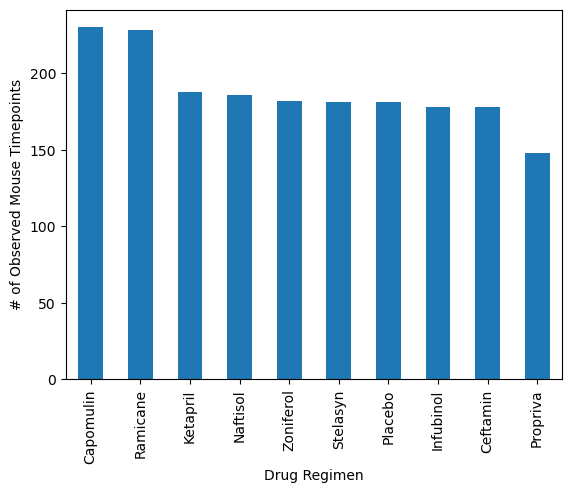

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_reg = metadata_study_results[["Drug Regimen","Timepoint"]]
timepoint_reg = timepoint_reg["Drug Regimen"].value_counts()
timepoint_reg.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")
plt.show()

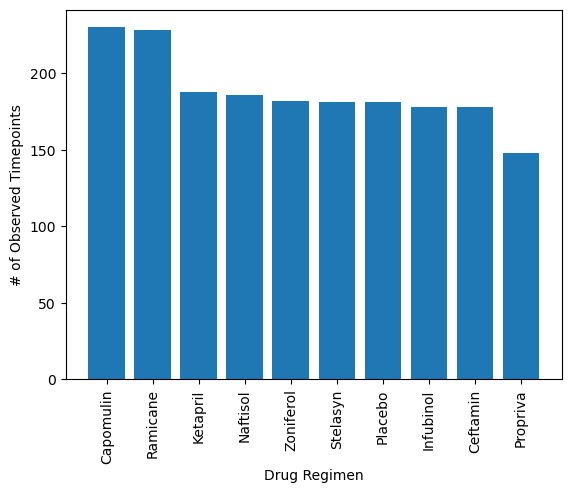

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint = timepoint_reg.values
drug_reg = timepoint_reg.index.values
plt.bar(drug_reg, timepoint,)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation = 90)
plt.show()

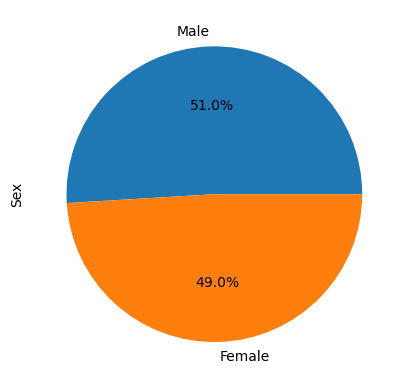

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = metadata_study_results.Sex.value_counts()
sex.plot(kind = "pie", autopct = "%1.1f%%", ylabel = "Sex")
plt.show()

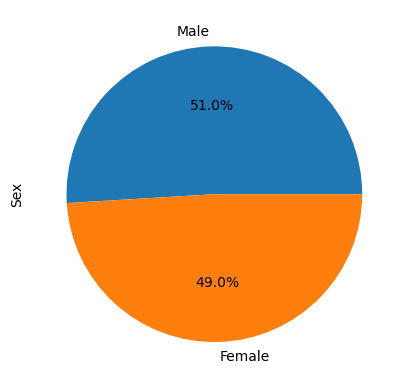

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = sex.index.values
chart = sex.values
plt.ylabel("Sex")
plt.pie(chart, labels = sexes, autopct = "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = metadata_study_results.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = last_timepoint.merge(metadata_study_results,on=['Mouse ID','Timepoint'],how="left")

In [15]:
last_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


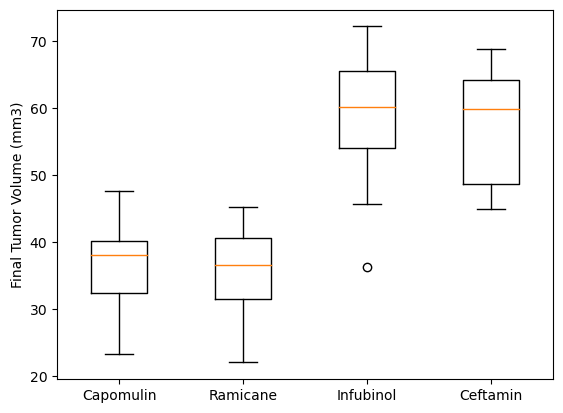

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

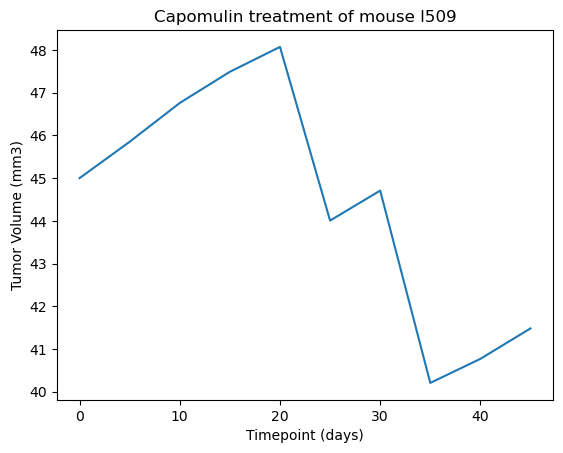

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = metadata_study_results.loc[(metadata_study_results['Drug Regimen'] == 'Capomulin') & \
                                            (metadata_study_results['Mouse ID'] == 'l509')]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

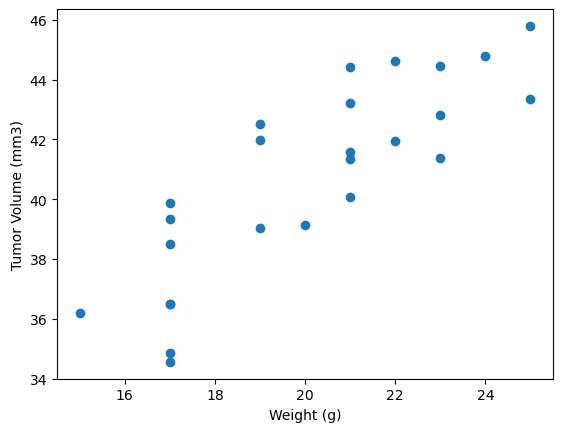

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter = metadata_study_results.loc[(metadata_study_results['Drug Regimen'] == 'Capomulin')]
capomulin_id = capomulin_scatter.groupby("Mouse ID")
avg_tumor_volume = capomulin_id[("Tumor Volume (mm3)")].mean()
mouse_weight = capomulin_id["Weight (g)"].mean()
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


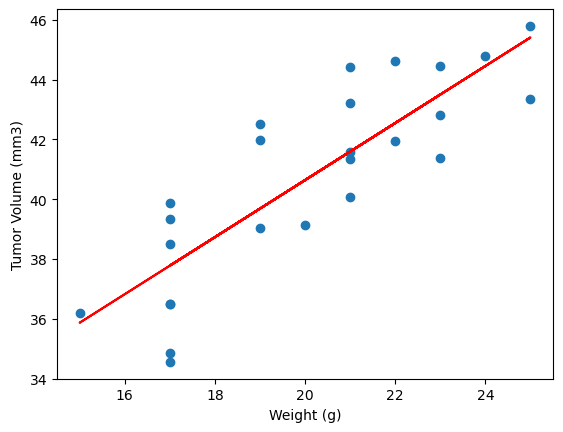

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

capomulin_scatter = metadata_study_results.loc[(metadata_study_results['Drug Regimen'] == 'Capomulin')]
capomulin_id = capomulin_scatter.groupby("Mouse ID")
avg_tumor_volume = capomulin_id[("Tumor Volume (mm3)")].mean()
mouse_weight = capomulin_id["Weight (g)"].mean()
line = mouse_weight * slope + intercept
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, line, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()